In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
features_names= [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total","target"
]


In [8]:
df=pd.read_csv("spambase.data",names=features_names)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [9]:
# Step 1: Exclude target column if needed
feature_df = df.drop(columns=['target'])  # adjust if needed

# Step 2: Calculate the percentage of zeros in each column
zero_percent = (feature_df == 0).sum() / len(feature_df) * 100

# Step 3: Filter columns where ≥ 97% of values are zero
mostly_zero_cols = zero_percent[zero_percent >= 97].sort_values(ascending=False)

# Step 4: Display
print("Columns with ≥ 97% zeros:")
print(mostly_zero_cols)


Columns with ≥ 97% zeros:
word_freq_3d       98.978483
word_freq_table    98.630732
word_freq_parts    98.196044
word_freq_font     97.457075
dtype: float64


In [10]:
df.drop(columns=mostly_zero_cols.index,inplace=True)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


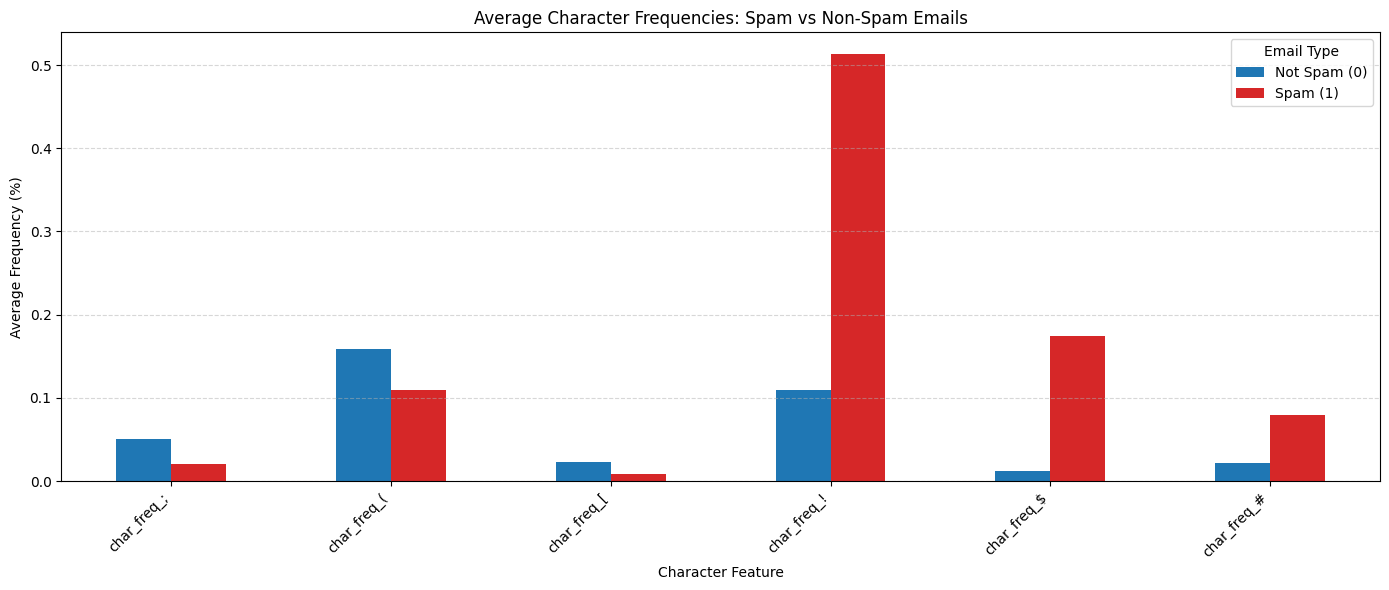

In [11]:

import matplotlib.pyplot as plt

# Step 1: Get only char_freq_* columns
char_freq_cols = [col for col in df.columns if col.startswith('char_freq_')]

# Step 2: Calculate average frequency per character for each class (target)
char_avg = df.groupby('target')[char_freq_cols].mean().T
char_avg.columns = ['Not Spam (0)', 'Spam (1)']

# Step 3: Plot side-by-side bar chart
ax = char_avg.plot(kind='bar', figsize=(14, 6), color=['#1f77b4', '#d62728'])

plt.title('Average Character Frequencies: Spam vs Non-Spam Emails')
plt.ylabel('Average Frequency (%)')
plt.xlabel('Character Feature')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Email Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:

import matplotlib.pyplot as plt

# Step 1: Identify word frequency columns
word_freq_cols = [col for col in df.columns if col.startswith('word_freq_')]

# Step 2: Group by target (spam=1, not spam=0), calculate average
word_avg = df.groupby('target')[word_freq_cols].mean().T
word_avg.columns = ['Not_Spam', 'Spam']

# Step 3: Identify words with very low freq in BOTH classes
# Threshold can be tuned. Let's use 0.1% (0.1) as cutoff
low_impact_words = word_avg[(word_avg['Not_Spam'] < 0.1) & (word_avg['Spam'] < 0.1)]

print("Words with low impact on both spam and ham (sorted by max average freq):")
print(low_impact_words.sort_values(by=['Spam', 'Not_Spam'], ascending=False))




Words with low impact on both spam and ham (sorted by max average freq):
                      Not_Spam      Spam
word_freq_report      0.042403  0.083574
word_freq_direct      0.083117  0.036718
word_freq_original    0.070581  0.008450
word_freq_conference  0.051227  0.002101
word_freq_415         0.077787  0.001776
word_freq_857         0.077306  0.000518
word_freq_cs          0.072027  0.000055


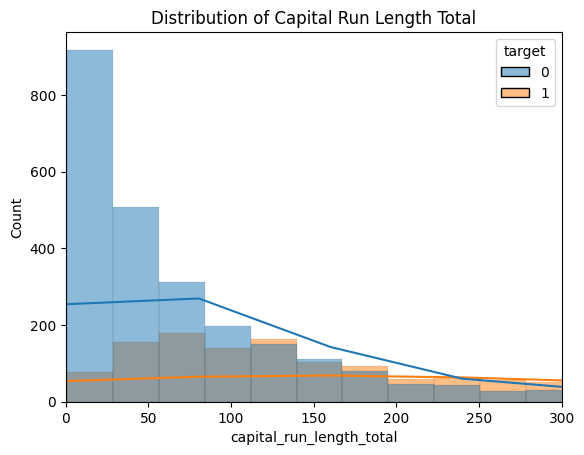

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='capital_run_length_total', hue='target', kde=True)
plt.title("Distribution of Capital Run Length Total")
plt.xlim(0, 300)  # 👈 Zoom in to the useful part
plt.show()


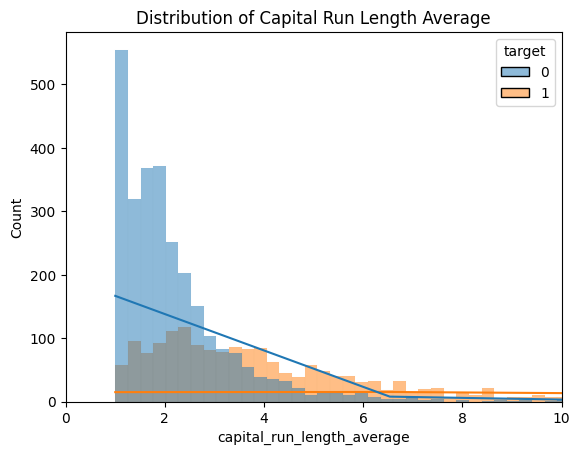

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='capital_run_length_average', hue='target', kde=True)
plt.title("Distribution of Capital Run Length Average")
plt.xlim(0, 10)  # 👈 Zoom in to the useful part
plt.show()


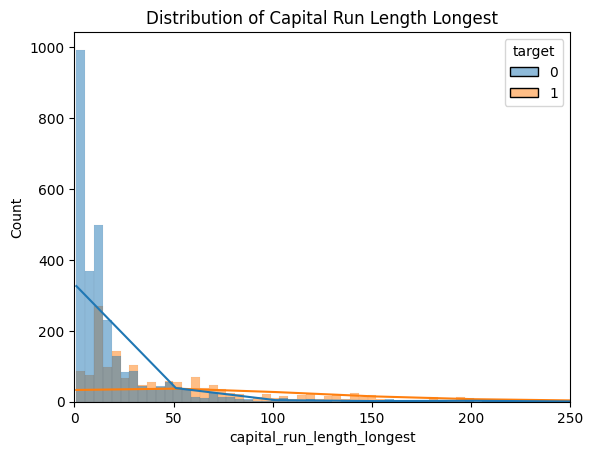

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='capital_run_length_longest', hue='target', kde=True)
plt.title("Distribution of Capital Run Length Longest")
plt.xlim(0, 250)  # 👈 Zoom in to the useful part
plt.show()

In [16]:
df['cap_run_length_total_bin'] = (df['capital_run_length_total'] > 225).astype(int)
df['capital_run_length_average_bin'] = (df['capital_run_length_average'] > 4).astype(int)
df['capital_run_length_longest_bin'] = (df['capital_run_length_longest'] > 50).astype(int)


In [17]:
df.drop(columns=['capital_run_length_total','capital_run_length_average','capital_run_length_longest'],inplace=True)
df



,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,target,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,1,1,0,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.000,0.132,0.0,0.372,0.180,0.048,1,1,1,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.010,0.143,0.0,0.276,0.184,0.010,1,1,1,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,1,0,0,0
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,0,0,0,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,0,0,0,0
4598,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,0,0,0,0
4599,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,0,0,0,0


In [18]:
df.sample(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,target,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
2771,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.414,0.000,0.276,0.000,0.000,0,0,0,0
3651,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
2836,0.00,0.00,0.00,2.17,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.367,0.000,0.000,0.000,0.000,0,0,0,0
1385,0.42,0.39,0.36,0.13,0.09,0.09,0.06,0.49,0.91,0.26,...,0.032,0.104,0.016,0.345,0.515,0.109,1,1,1,1
3288,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.719,0.000,0.000,0.000,0.000,0,0,0,0
4279,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
1483,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,1.094,0.000,0.000,1,0,0,0
2671,0.00,0.00,2.04,2.04,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.722,0.000,0.000,0.000,0.000,0,0,0,0
3100,0.00,14.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0
3903,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.478,0.000,0.000,0.000,0.000,0,0,0,0


In [19]:
new_df=df.drop('target',axis=1)

all_zero_rows = new_df[(new_df == 0).all(axis=1)]
all_zero_rows

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [20]:
df = df.drop(index=all_zero_rows.index)
df.shape

(4490, 54)

In [21]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
#removing cols which are stopwords or special chars or puntuation marks ans converting it using postemStermmer
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)
remove_features=[]
important_chars=['!','$']
#low_impact_word_list = list(low_impact_words.index)

for col in df.columns:
  if(col.startswith("word_freq")):
    word = col.replace("word_freq_", "")
    if word in stop_words:
      remove_features.append(col)
  elif col.startswith("char_freq_"):
      char = col.replace("char_freq_", "")
      if char in punctuation and char not in important_chars:
          remove_features.append(col)

remove_features

['word_freq_all',
 'word_freq_our',
 'word_freq_over',
 'word_freq_will',
 'word_freq_you',
 'word_freq_your',
 'word_freq_re',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 'char_freq_#']

In [23]:
df = df.drop(columns=remove_features)



In [24]:
df.describe()

,word_freq_make,word_freq_address,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_people,word_freq_report,word_freq_addresses,...,word_freq_original,word_freq_project,word_freq_edu,word_freq_conference,char_freq_!,char_freq_$,target,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
count,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,...,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000,4490.000000
mean,0.107138,0.218281,0.117031,0.107898,0.092294,0.245332,0.061303,0.096252,0.060076,0.050421,...,0.047238,0.081154,0.184269,0.032657,0.275723,0.077685,0.402673,0.289755,0.223163,0.219599
std,0.308661,1.305994,0.395834,0.405654,0.281675,0.651565,0.203799,0.304368,0.339174,0.261907,...,0.226443,0.629492,0.921871,0.289201,0.824583,0.248611,0.490491,0.453699,0.416413,0.414021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.328000,0.056000,1.000000,1.000000,0.000000,0.000000
max,4.540000,14.280000,7.270000,11.110000,5.260000,18.180000,2.610000,5.550000,10.000000,4.410000,...,3.570000,20.000000,22.050000,10.000000,32.478000,6.003000,1.000000,1.000000,1.000000,1.000000


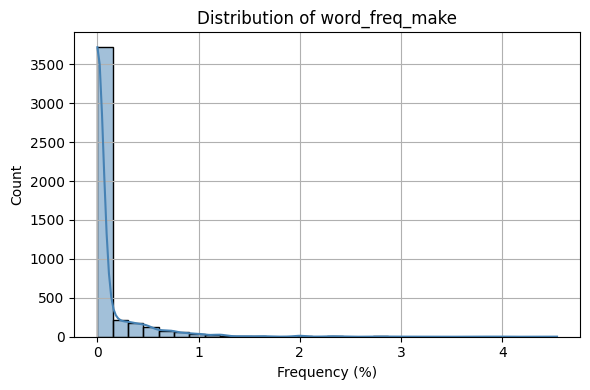

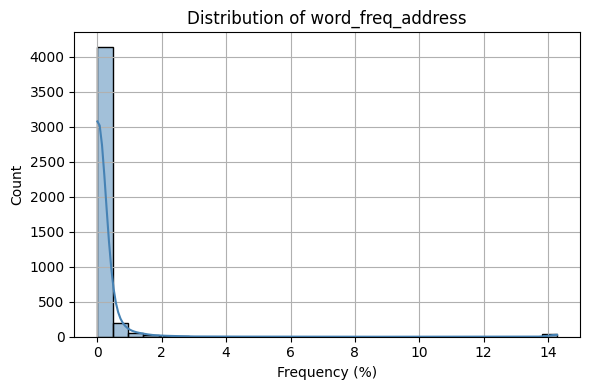

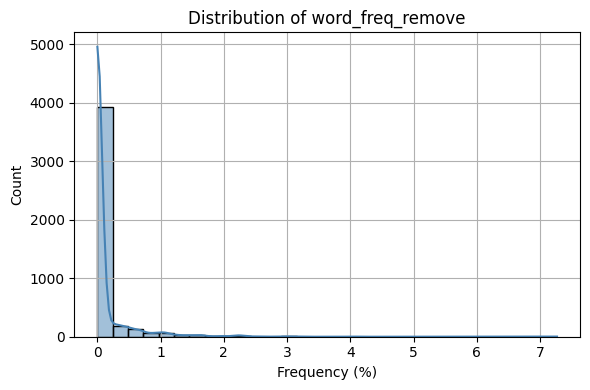

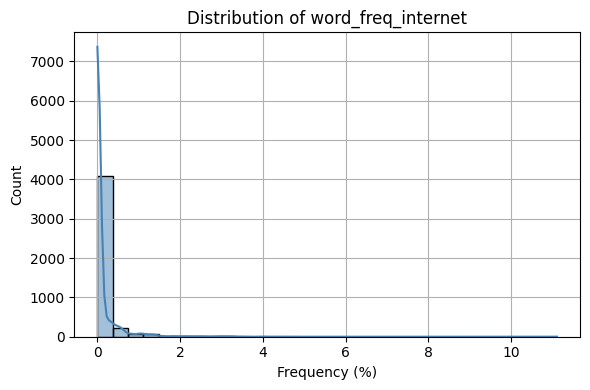

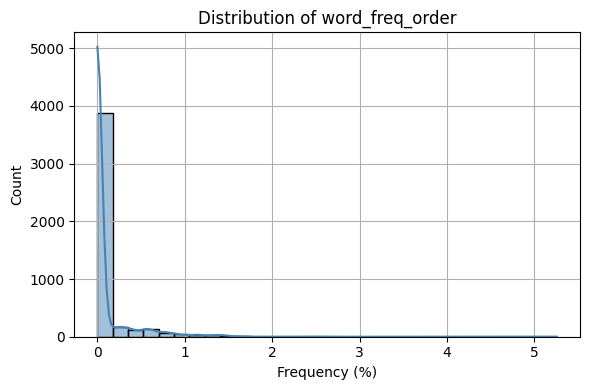

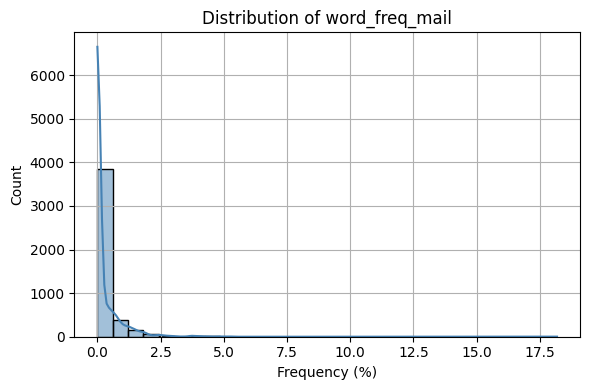

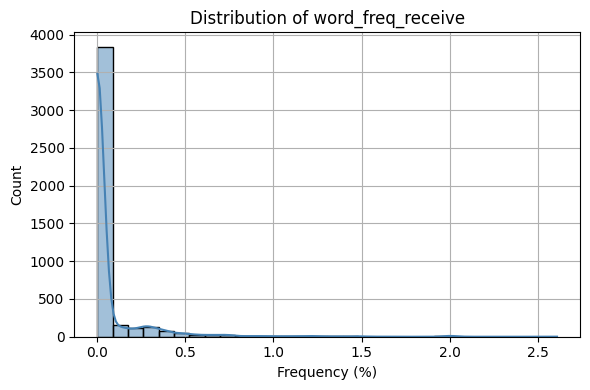

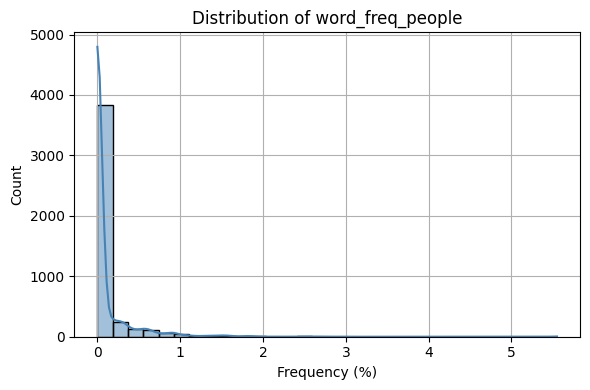

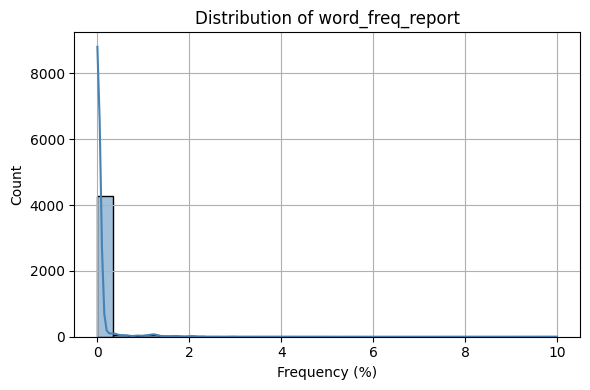

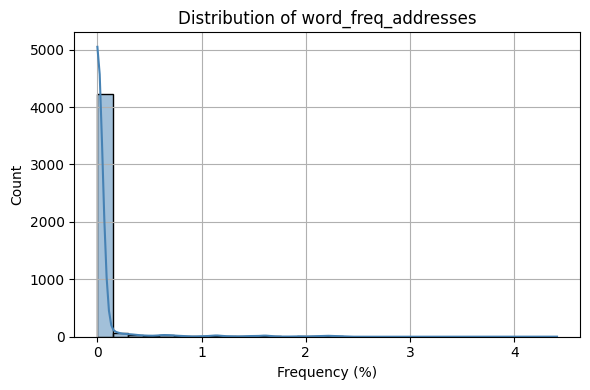

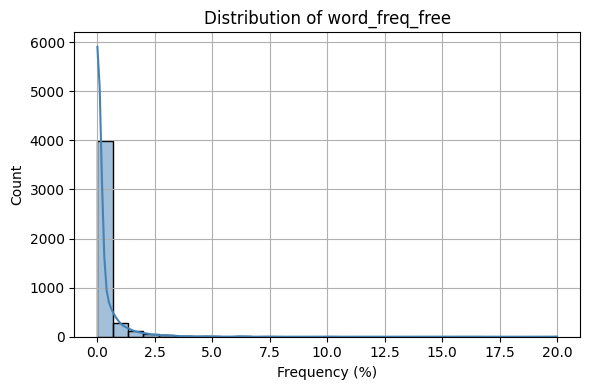

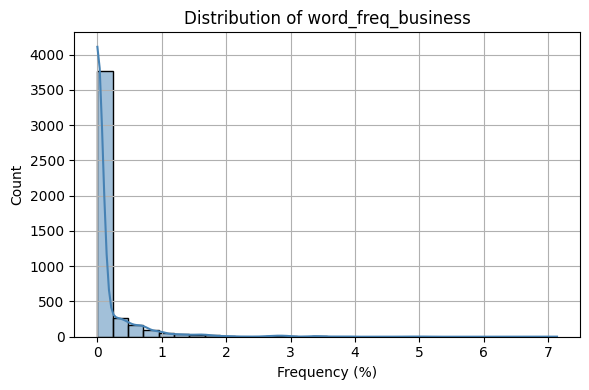

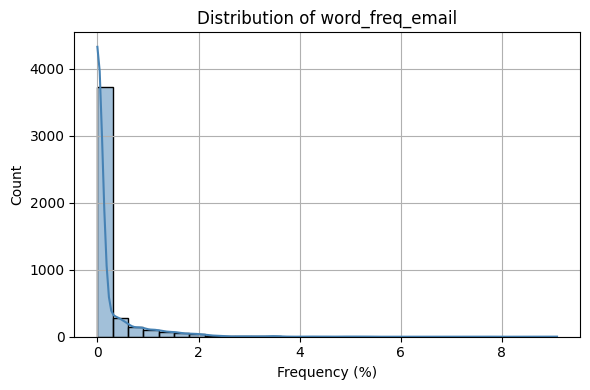

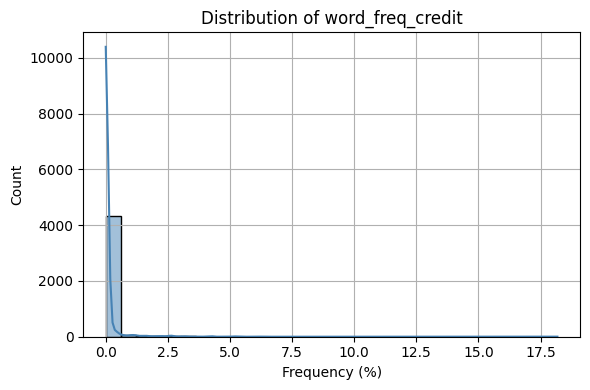

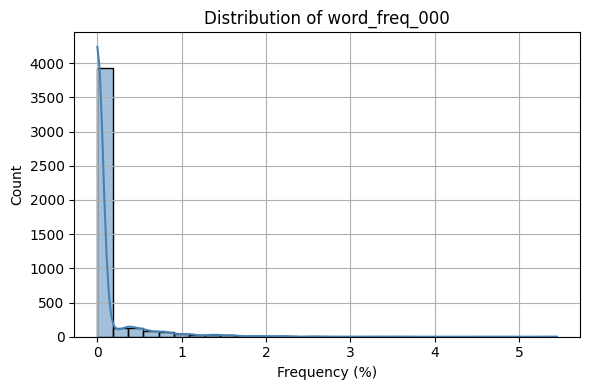

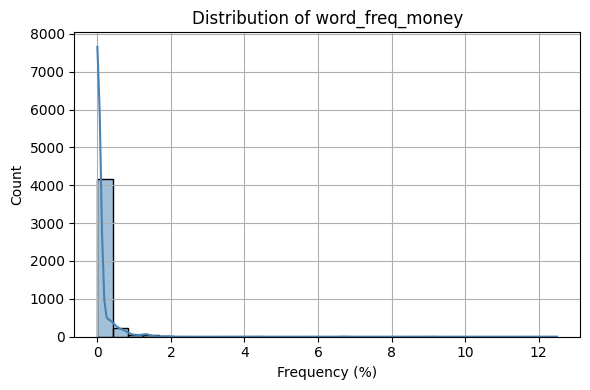

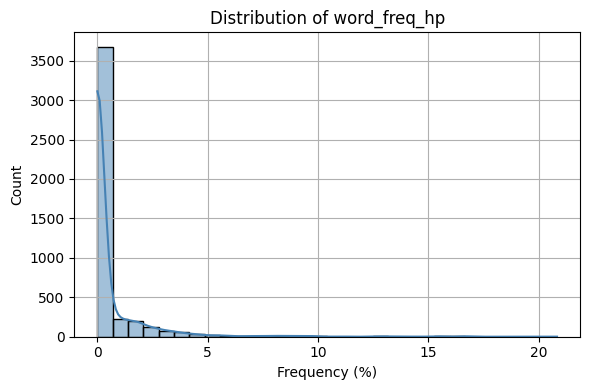

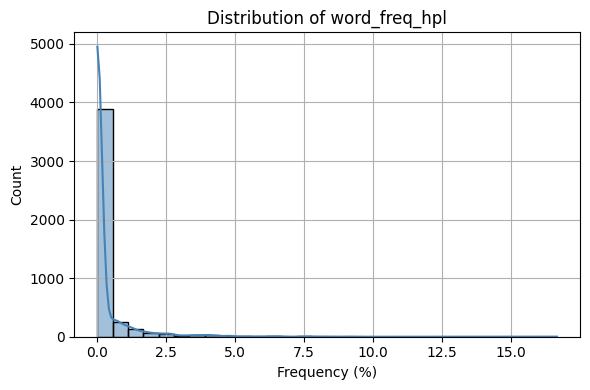

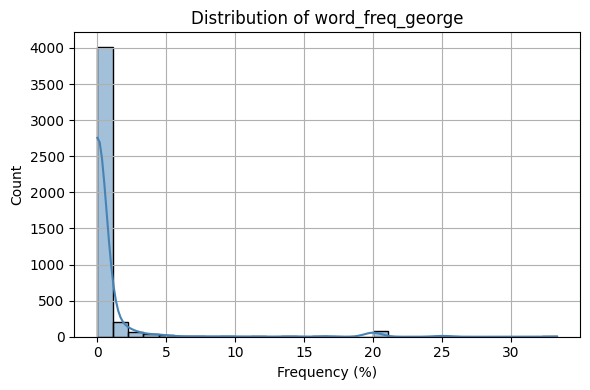

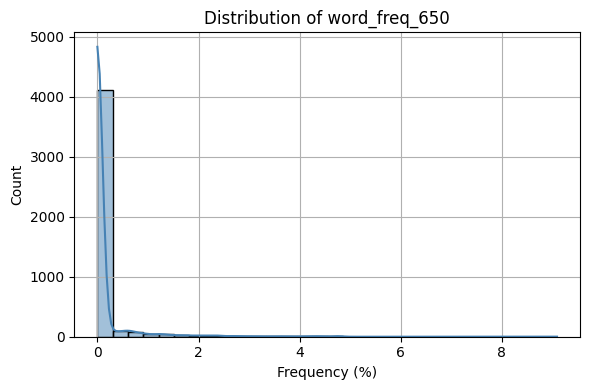

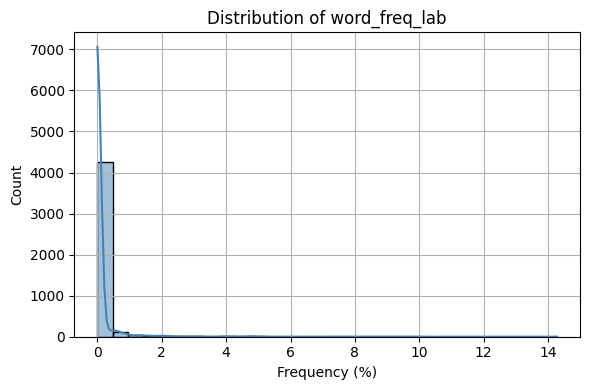

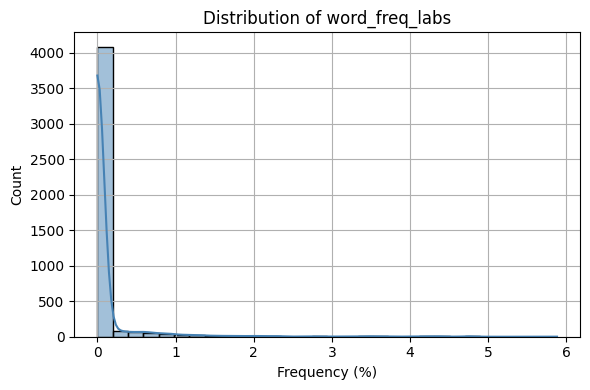

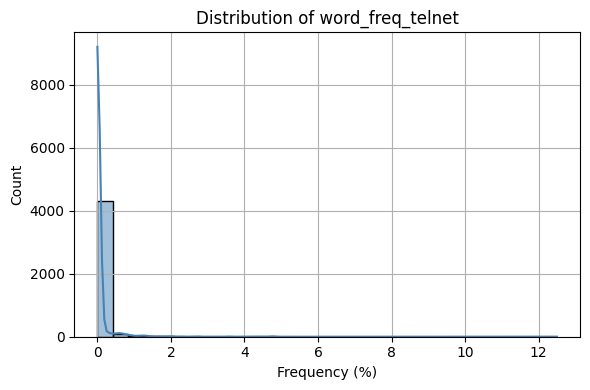

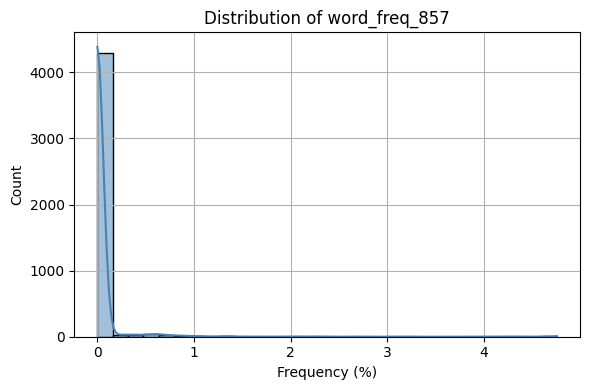

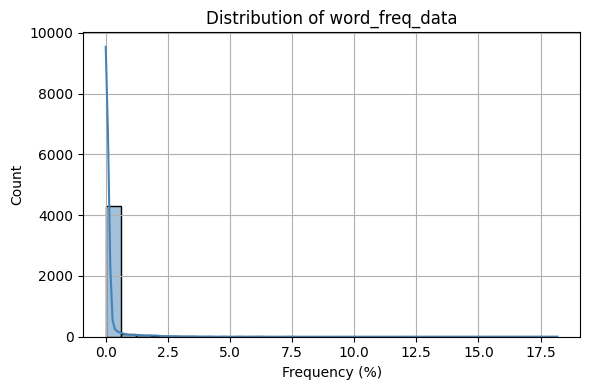

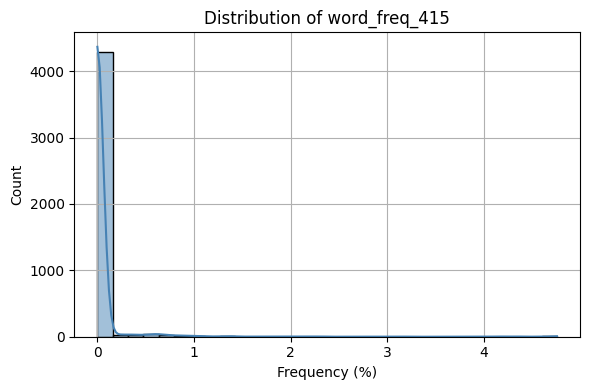

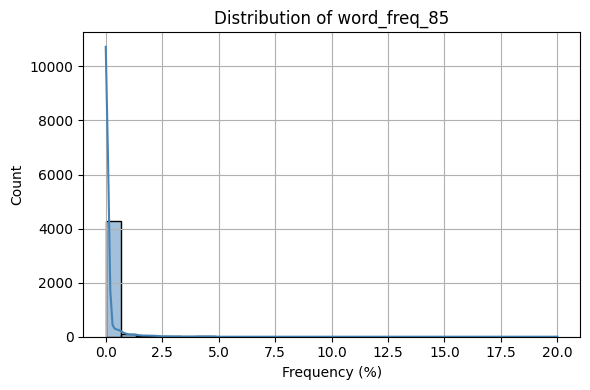

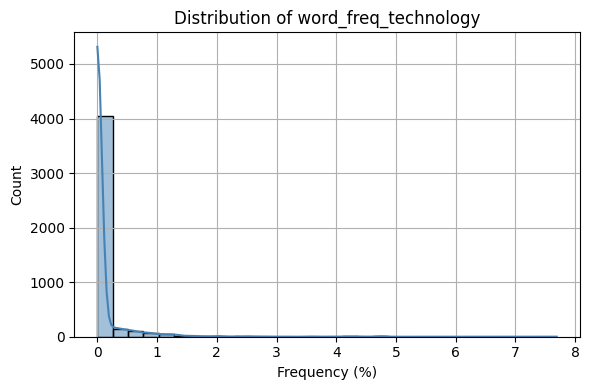

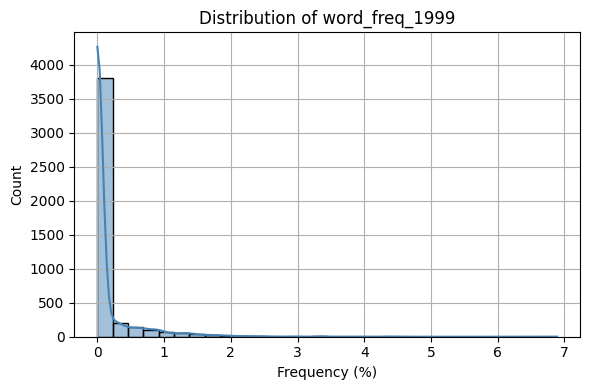

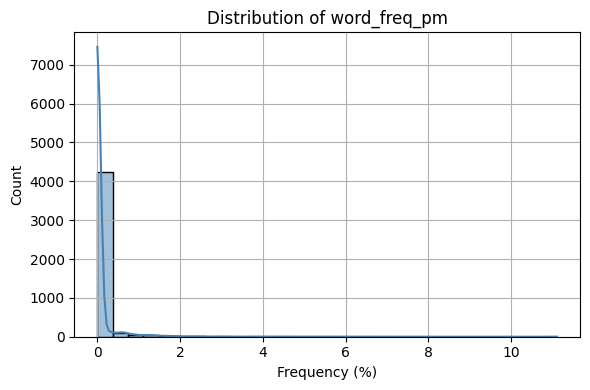

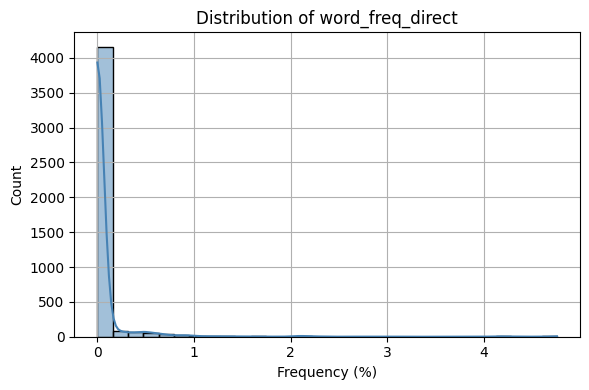

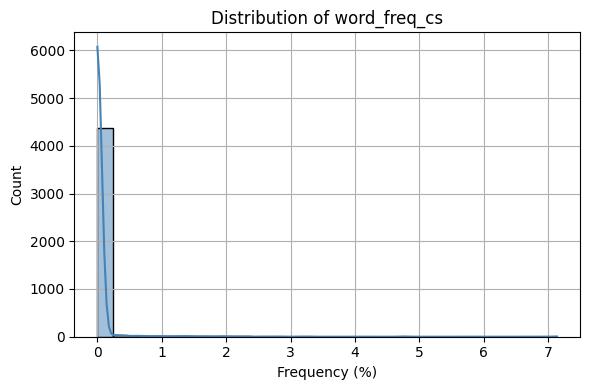

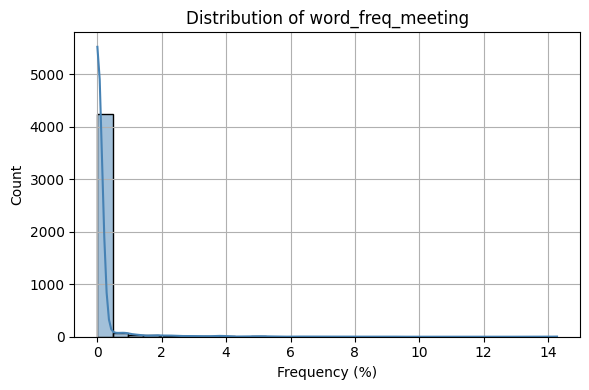

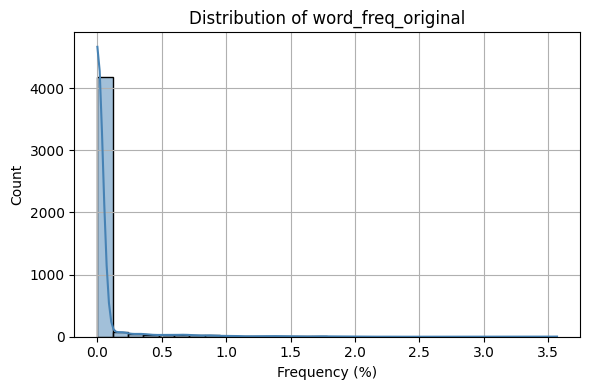

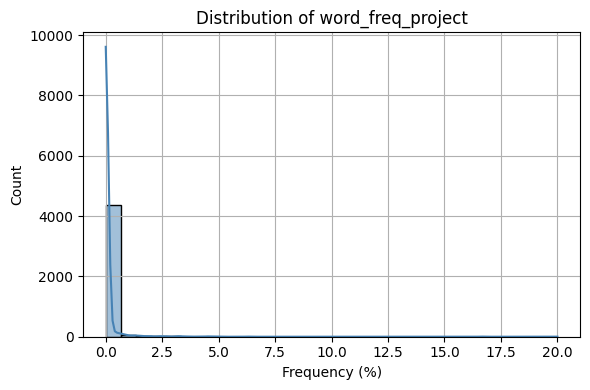

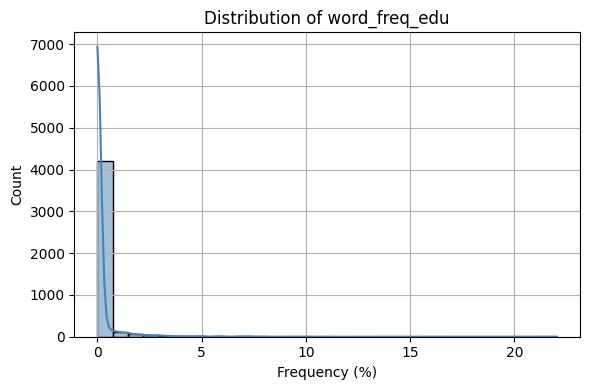

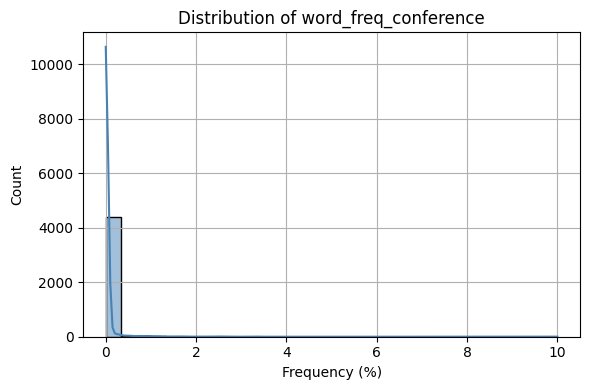

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only word frequency columns

word_freq_cols = [col for col in df.columns if col.startswith("word_freq")]

# Plot histograms for each word frequency column
for col in word_freq_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Frequency (%)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
# 1. Filter only spam emails
spam_df = df[df['target'] == 1]  # assuming 1 = spam

# 2. Select only word frequency columns
word_freq_cols = [col for col in df.columns if col.startswith("word_freq_")]

# 3. Compute average frequency for each word in spam emails
avg_freq_spam = spam_df[word_freq_cols].mean().sort_values(ascending=False)

# 4. Get top 20
top_20_words_spam = avg_freq_spam.head(20)

# 5. Display
print(top_20_words_spam)


word_freq_free          0.519795
word_freq_mail          0.351477
word_freq_email         0.320111
word_freq_business      0.288302
word_freq_remove        0.276167
word_freq_000           0.247738
word_freq_money         0.213468
word_freq_internet      0.208717
word_freq_credit        0.206090
word_freq_order         0.170531
word_freq_address       0.165105
word_freq_make          0.152760
word_freq_people        0.143944
word_freq_receive       0.118761
word_freq_addresses     0.112389
word_freq_report        0.083805
word_freq_1999          0.043590
word_freq_direct        0.036820
word_freq_technology    0.029596
word_freq_650           0.018850
dtype: float64


In [26]:
# 1. Filter only ham emails
ham_df = df[df['target'] == 0]  # assuming 0 = ham

# 2. Select only word frequency columns
word_freq_cols = [col for col in df.columns if col.startswith("word_freq_")]

# 3. Compute average frequency for each word in ham emails
avg_freq_ham = ham_df[word_freq_cols].mean().sort_values(ascending=False)

# 4. Get top 20
top_20_words_ham = avg_freq_ham.head(20)

# 5. Display
print(top_20_words_ham)

word_freq_george        1.315272
word_freq_hp            0.930865
word_freq_hpl           0.449068
word_freq_edu           0.298535
word_freq_address       0.254128
word_freq_meeting       0.225377
word_freq_1999          0.205559
word_freq_650           0.201465
word_freq_85            0.176152
word_freq_mail          0.173777
word_freq_labs          0.172409
word_freq_lab           0.169228
word_freq_data          0.156954
word_freq_technology    0.147271
word_freq_project       0.131641
word_freq_pm            0.126488
word_freq_telnet        0.110224
word_freq_email         0.101137
word_freq_direct        0.086402
word_freq_415           0.080861
dtype: float64


In [27]:
top_20_spam_word_list=list(top_20_words_spam.index)
top_20_ham_word_list=list(top_20_words_ham.index)




for col in top_20_ham_word_list:
    # For spam rows only, set the value to 0 if it's greater than 0
    df.loc[(df['target'] == 1) & (df[col] > 0), col] = 0

for col in top_20_spam_word_list:
    # For ham rows only, set the value to 0 if it's greater than 0
    df.loc[(df['target'] == 0) & (df[col] > 0), col] = 0

df

,word_freq_make,word_freq_address,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_people,word_freq_report,word_freq_addresses,...,word_freq_original,word_freq_project,word_freq_edu,word_freq_conference,char_freq_!,char_freq_$,target,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.778,0.000,1,1,0,1
1,0.21,0.0,0.21,0.07,0.00,0.0,0.21,0.65,0.21,0.14,...,0.00,0.00,0.00,0.0,0.372,0.180,1,1,1,1
2,0.06,0.0,0.19,0.12,0.64,0.0,0.38,0.12,0.00,1.75,...,0.12,0.00,0.00,0.0,0.276,0.184,1,1,1,1
3,0.00,0.0,0.31,0.63,0.31,0.0,0.31,0.31,0.00,0.00,...,0.00,0.00,0.00,0.0,0.137,0.000,1,0,0,0
4,0.00,0.0,0.31,0.63,0.31,0.0,0.31,0.31,0.00,0.00,...,0.00,0.00,0.00,0.0,0.135,0.000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.31,0.31,0.0,0.000,0.000,0,0,0,0
4597,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,2.00,0.0,0.353,0.000,0,0,0,0
4598,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,1.20,0.0,0.000,0.000,0,0,0,0
4599,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.32,0.32,0.0,0.000,0.000,0,0,0,0


In [37]:
df.shape

(4490, 43)

In [35]:
new_df=df.drop('target',axis=1)

all_zero_rows = new_df[(new_df == 0).all(axis=1)]
all_zero_rows

,word_freq_make,word_freq_address,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_people,word_freq_report,word_freq_addresses,...,word_freq_meeting,word_freq_original,word_freq_project,word_freq_edu,word_freq_conference,char_freq_!,char_freq_$,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [38]:
df = df.drop(index=all_zero_rows.index)
df.shape

(4155, 43)

In [46]:
# Step 1: Exclude target column if needed
feature_df = df.drop(columns=['target'])  # adjust if needed

# Step 2: Calculate the percentage of zeros in each column
zero_percent = (feature_df == 0).sum() / len(feature_df) * 100

# Step 3: Filter columns where ≥ 97% of values are zero
mostly_zero_cols = zero_percent[zero_percent >= 97].sort_values(ascending=False)

# Step 4: Display
print("Columns with ≥ 97% zeros:")
print(mostly_zero_cols)


Columns with ≥ 97% zeros:
word_freq_address       100.0
word_freq_mail          100.0
word_freq_email         100.0
word_freq_650           100.0
word_freq_technology    100.0
word_freq_1999          100.0
word_freq_direct        100.0
dtype: float64


Model Training

In [47]:
df.drop(columns=mostly_zero_cols.index,inplace=True)
df

,word_freq_make,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,...,word_freq_original,word_freq_project,word_freq_edu,word_freq_conference,char_freq_!,char_freq_$,target,cap_run_length_total_bin,capital_run_length_average_bin,capital_run_length_longest_bin
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,...,0.00,0.00,0.00,0.0,0.778,0.000,1,1,0,1
1,0.21,0.21,0.07,0.00,0.21,0.65,0.21,0.14,0.14,0.07,...,0.00,0.00,0.00,0.0,0.372,0.180,1,1,1,1
2,0.06,0.19,0.12,0.64,0.38,0.12,0.00,1.75,0.06,0.06,...,0.12,0.00,0.00,0.0,0.276,0.184,1,1,1,1
3,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,...,0.00,0.00,0.00,0.0,0.137,0.000,1,0,0,0
4,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,...,0.00,0.00,0.00,0.0,0.135,0.000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.31,0.31,0.0,0.000,0.000,0,0,0,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.00,0.0,0.353,0.000,0,0,0,0
4598,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.20,0.0,0.000,0.000,0,0,0,0
4599,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.32,0.32,0.0,0.000,0.000,0,0,0,0


In [48]:
from sklearn.model_selection import train_test_split

# Spliting features and target
X = df.drop("target", axis=1)
y = df["target"]

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#X_train_bin = (X_train > 0).astype(int)
#X_test_bin = (X_test > 0).astype(int)




In [55]:
important_features=[]
for feature in X.columns:
  important_features.append(feature)

important_features

['word_freq_make',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_receive',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_credit',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_pm',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_edu',
 'word_freq_conference',
 'char_freq_!',
 'char_freq_$',
 'cap_run_length_total_bin',
 'capital_run_length_average_bin',
 'capital_run_length_longest_bin']

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9446450060168472
[[415  46]
 [  0 370]]
0.8894230769230769


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9482551143200962
[[419  42]
 [  1 369]]
0.8978102189781022


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9747292418772563
[[459   2]
 [ 19 351]]
0.9943342776203966


In [56]:
import pickle
pickle.dump(bnb,open('model.pkl','wb'))

In [57]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [58]:
!wget -q -O - ipv4.icanhazip.com

104.199.224.215


In [59]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼

⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.199.224.215:8501

⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://better-rocks-warn.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro